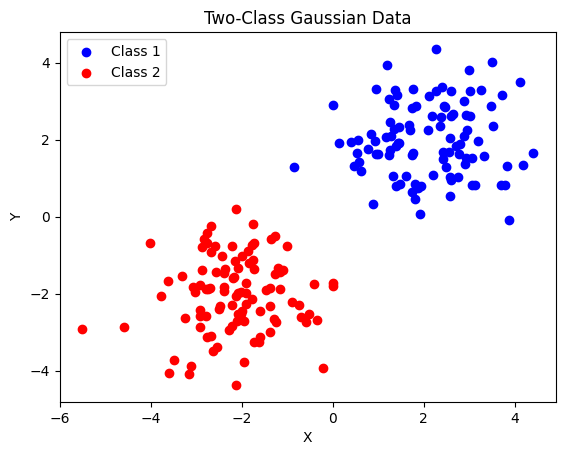

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Set the parameters for class 1
mean1 = [2, 2]
cov1 = [[1, 0], [0, 1]]

# Set the parameters for class 2
mean2 = [-2, -2]
cov2 = [[1, 0], [0, 1]]

# Generate samples for class 1
samples_class1 = np.random.multivariate_normal(mean1, cov1, 100)

# Generate samples for class 2
samples_class2 = np.random.multivariate_normal(mean2, cov2, 100)

# Plot the data
plt.scatter(samples_class1[:, 0], samples_class1[:, 1], c='blue', label='Class 1')
plt.scatter(samples_class2[:, 0], samples_class2[:, 1], c='red', label='Class 2')

# Add labels and title
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Two-Class Gaussian Data')

# Add a legend
plt.legend()

# Show the plot
plt.show()


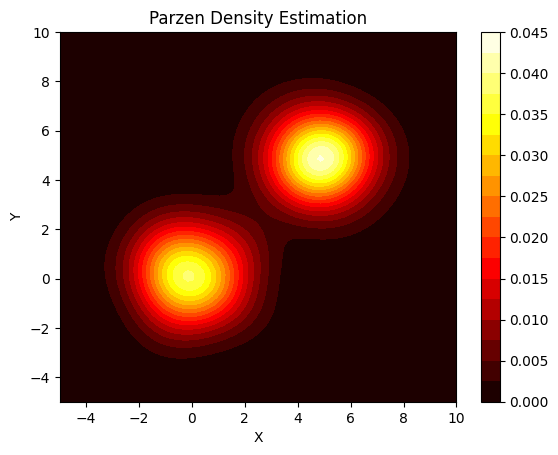

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

def parzen_density_estimate(samples, query_point, h):
    """Compute the Parzen density estimate at a query point."""
    kernel = multivariate_normal(mean=query_point, cov=h)
    return np.mean(kernel.pdf(samples))

def parzen_density_estimation(samples, query_points, h):
    """Compute the Parzen density estimates at multiple query points."""
    estimates = []
    for point in query_points:
        estimate = parzen_density_estimate(samples, point, h)
        estimates.append(estimate)
    return np.array(estimates)

# Generate random data
np.random.seed(0)
data = np.concatenate([np.random.normal(loc=0, scale=1, size=(100, 2)),
                       np.random.normal(loc=5, scale=1, size=(100, 2))])

# Set the query points
x = np.linspace(-5, 10, 100)
y = np.linspace(-5, 10, 100)
X, Y = np.meshgrid(x, y)
query_points = np.vstack([X.ravel(), Y.ravel()]).T

# Set the bandwidth (window size)
h = np.eye(2)  # Bandwidth matrix (covariance matrix)

# Compute the Parzen density estimates
density_estimates = parzen_density_estimation(data, query_points, h)

# Reshape the density estimates for plotting
density_estimates = density_estimates.reshape(X.shape)

# Plot the density estimates
plt.contourf(X, Y, density_estimates, levels=20, cmap='hot')
plt.colorbar()

# Add labels and title
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Parzen Density Estimation')

# Show the plot
plt.show()


In [5]:
from itertools import starmap

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import mlab
sns.set(color_codes=True)
# inline plots in jupyter notebook
%matplotlib inline


# generate synthetic data from a mixture of two Gaussians with equal weights
# the solution below readily generalises to more components 
nsamples = 10000
means = [6, 12]
sds = [1, 1]
weights = [0.5, 0.5]
draws = np.random.multinomial(nsamples, weights)
samples = np.concatenate(list(starmap(np.random.normal, zip(means, sds, draws))))

means2 = [3, 9]
sds2 = [1, 1]
weights2 = [0.5, 0.5]
draws2 = np.random.multinomial(nsamples, weights2)
samples2 = np.concatenate(list(starmap(np.random.normal, zip(means2, sds2, draws2))))

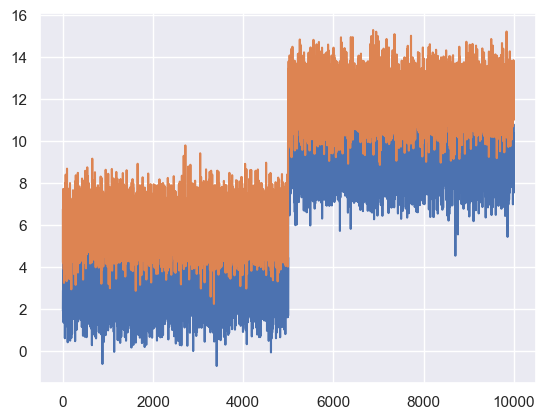

In [16]:
plt.plot(samples2)
plt.plot(samples)
plt.show()

(array([  1.,   1.,   5.,   9.,  14.,  32.,  64., 106., 191., 228., 323.,
        380., 474., 510., 540., 484., 436., 375., 286., 195., 149.,  87.,
         51.,  25.,  18.,  10.,  12.,  25.,  40.,  50., 114., 163., 231.,
        317., 390., 466., 536., 535., 514., 434., 383., 245., 212., 137.,
         89.,  51.,  31.,  17.,  10.,   4.]),
 array([ 2.25989936,  2.52055526,  2.78121116,  3.04186706,  3.30252296,
         3.56317886,  3.82383476,  4.08449066,  4.34514656,  4.60580245,
         4.86645835,  5.12711425,  5.38777015,  5.64842605,  5.90908195,
         6.16973785,  6.43039375,  6.69104965,  6.95170555,  7.21236145,
         7.47301735,  7.73367325,  7.99432914,  8.25498504,  8.51564094,
         8.77629684,  9.03695274,  9.29760864,  9.55826454,  9.81892044,
        10.07957634, 10.34023224, 10.60088814, 10.86154404, 11.12219993,
        11.38285583, 11.64351173, 11.90416763, 12.16482353, 12.42547943,
        12.68613533, 12.94679123, 13.20744713, 13.46810303, 13.72875893,
 

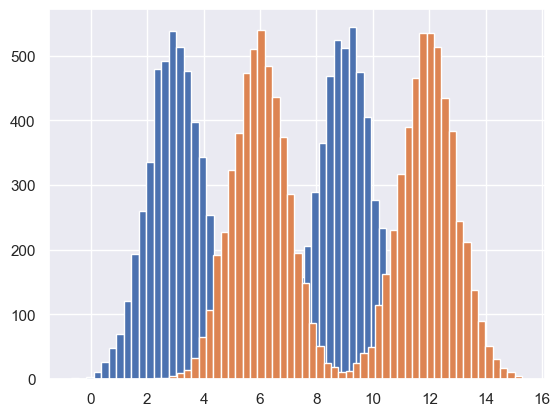

In [14]:
plt.hist(samples2,bins = 50)
plt.hist(samples,bins = 50)

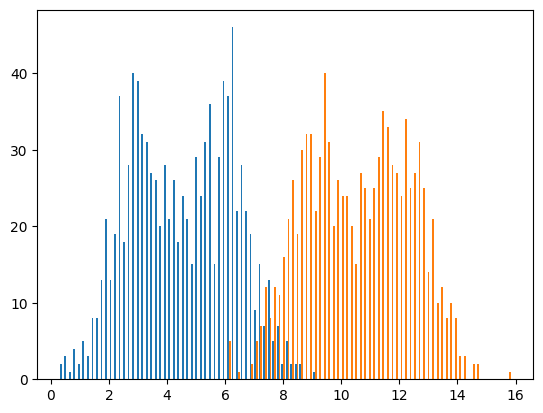

Means extimated from EM also: 
[[ 6.00769466 12.03737598]
 [ 3.07216736  9.09013189]]
covariances extimated from the EM algo: 
[[[ 0.92629895 -0.02257689]
  [-0.02257689  0.98739338]]

 [[ 0.93509432  0.0470173 ]
  [ 0.0470173   1.09578537]]]
Predicted Labels:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

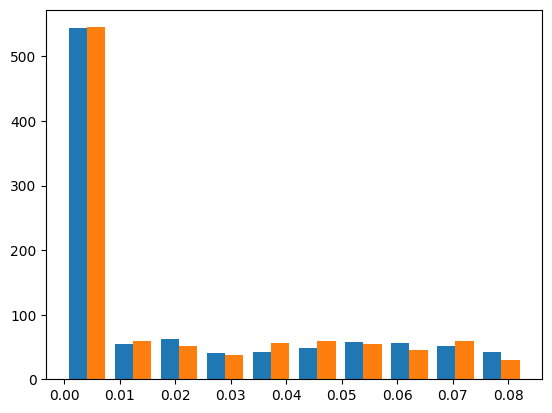

In [39]:
import numpy as np
from scipy.stats import multivariate_normal

# Generate synthetic data with given data
# seed the randomness for repeatability 
np.random.seed(42)
num_samples = 1000

# Class 0
mean_0 = np.array([6, 12])
cov_0 = np.array([[1, 0], [0, 1]])
class_0 = np.random.multivariate_normal(mean_0, cov_0, num_samples // 2)

# Class 1
mean_1 = np.array([3, 9])
cov_1 = np.array([[1, 0], [0, 1]])
class_1 = np.random.multivariate_normal(mean_1, cov_1, num_samples // 2)

# Concatenate data
data = np.concatenate((class_0, class_1), axis=0)

plt.hist(class_0,bins = 50)

plt.hist(class_1,bins = 50)
plt.show()
# GMM Parameters
num_clusters = 2
num_iterations = 100

# Initialize parameters
weights = np.ones(num_clusters) / num_clusters
means = np.random.randn(num_clusters, 2)
covariances = np.array([np.eye(2)] * num_clusters)

# EM Algorithm
for _ in range(num_iterations):
    # E-step
    responsibilities = np.zeros((num_samples, num_clusters))
    for k in range(num_clusters):
        responsibilities[:, k] = weights[k] * multivariate_normal.pdf(data, mean=means[k], cov=covariances[k])

    responsibilities /= np.sum(responsibilities, axis=1, keepdims=True)

    # M-step
    for k in range(num_clusters):
        Nk = np.sum(responsibilities[:, k])
        weights[k] = Nk / num_samples
        means[k] = np.dot(responsibilities[:, k], data) / Nk
        covariances[k] = np.dot(responsibilities[:, k] * (data - means[k]).T, (data - means[k])) / Nk

# Classify the data based on GMM probabilities
probabilities = np.zeros((num_samples, num_clusters))

for k in range(num_clusters):
    probabilities[:, k] = weights[k] * multivariate_normal.pdf(data, mean=means[k], cov=covariances[k])
print('Means extimated from EM also: ')
print(means)
print("covariances extimated from the EM algo: ")
print(covariances)
plt.hist(probabilities)

predicted_labels = np.argmax(probabilities, axis=1)

# Print the predicted labels
print("Predicted Labels:")
print(predicted_labels)


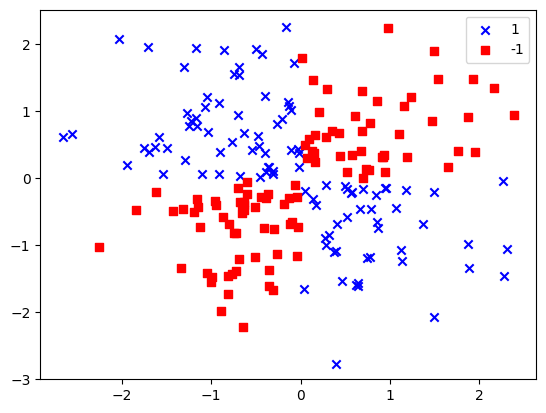

In [19]:
import numpy as np
np.random.seed(0)
X_xor = np.random.randn(200, 2)
y_xor = np.logical_xor(X_xor[:, 0] > 0, X_xor[:, 1] > 0)
y_xor = np.where(y_xor, 1, -1)
plt.scatter(X_xor[y_xor==1, 0], X_xor[y_xor==1, 1], c='b', marker='x', label='1')
plt.scatter(X_xor[y_xor==-1, 0], X_xor[y_xor==-1, 1], c='r', marker='s', label='-1')
plt.ylim(-3.0)
plt.legend()
plt.show()


C:\Users\prafu\AppData\Local\Temp\ipykernel_7428\680130342.py:26: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


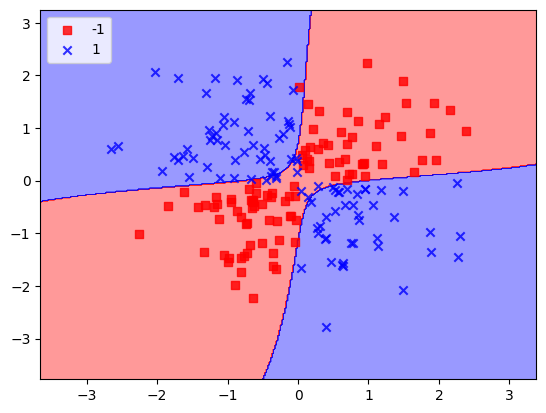

In [20]:
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
   # setup marker generator and color map
   markers = ('s', 'x', 'o', '^', 'v')
   colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
   cmap = ListedColormap(colors[:len(np.unique(y))])

   # plot the decision surface
   x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
   x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
   xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
   np.arange(x2_min, x2_max, resolution))
   Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
   Z = Z.reshape(xx1.shape)
   plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
   plt.xlim(xx1.min(), xx1.max())
   plt.ylim(xx2.min(), xx2.max())

   # plot all samples
   X_test, y_test = X[test_idx, :], y[test_idx]
   for idx, cl in enumerate(np.unique(y)):
      plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
               alpha=0.8, c=cmap(idx),
               marker=markers[idx], label=cl)
   # highlight test samples
   if test_idx:
      X_test, y_test = X[test_idx, :], y[test_idx]
      plt.scatter(X_test[:, 0], X_test[:, 1], c='',
               alpha=1.0, linewidth=1, marker='o',
               s=55, label='test set')

# create xor dataset
np.random.seed(0)
X_xor = np.random.randn(200, 2)
y_xor = np.logical_xor(X_xor[:, 0] > 0, X_xor[:, 1] > 0)
y_xor = np.where(y_xor, 1, -1)

# SVM
from sklearn.svm import SVC
svm = SVC(kernel='rbf', random_state=0, gamma=0.10, C=10.0)
svm.fit(X_xor, y_xor)

# draw decision boundary
plot_decision_regions(X_xor, y_xor, classifier=svm)
plt.legend(loc='upper left')
plt.show()